# Import modules

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Define functions & parameters

In [12]:
# parameter values
mumax = 0.20      # 1/hour
Ks = 1.00         # g/liter
Yxs = 0.5         # g/g
Ypx = 0.2         # g/g
Sf = 10.0         # g/liter

# inlet flowrate
def F(t):
    return 0.1 # 0.05

# reaction rates
## specific cell growth rate
def mu(S):
    return mumax*S/(Ks + S)

## cell growth rate
def Rg(X,S):
    return mu(S)*X

## product formation rate
def Rp(X,S):
    return Ypx*Rg(X,S)

# differential equations
def xdot(x,t):
    X,P,S,V = x
    dX = -F(t)*X/V + Rg(X,S)
    dP = -F(t)*P/V + Rp(X,S)
    dS = F(t)*(Sf-S)/V - Rg(X,S)/Yxs # substrate consumption dominated by cell growth
    dV = F(t)
    return [dX,dP,dS,dV]



# Simulation

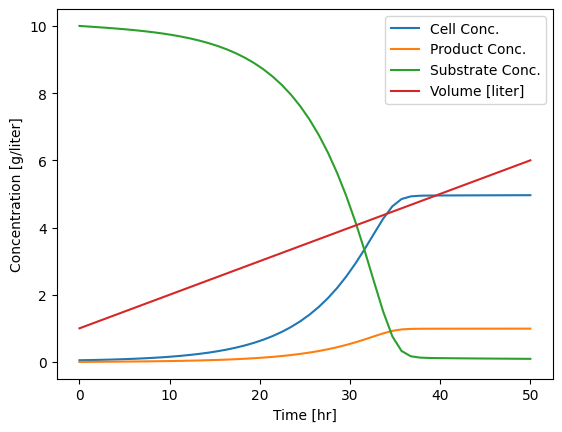

In [14]:
X0 = 0.05
P0 = 0
S0 = 10
V0 = 1.0
IC = [X0, P0, S0, V0] # X0, P0, S0, V0

t = np.linspace(0,50)
sol = odeint(xdot,IC,t)
X,P,S,V = sol.transpose()

plt.plot(t,X)
plt.plot(t,P)
plt.plot(t,S)
plt.plot(t,V)

plt.xlabel('Time [hr]')
plt.ylabel('Concentration [g/liter]')
plt.legend(['Cell Conc.',
            'Product Conc.',
            'Substrate Conc.',
            'Volume [liter]'])

